#### Data Set Information/Background Context:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Context for the target variable - Bank Term Deposit
A term deposit (or CD) is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term.

Term deposits are an extremely safe investment and are therefore very appealing to conservative, low-risk investors.

In [1]:

# Imports
from __future__ import division, print_function, unicode_literals
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from scipy.stats import skew
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
data = pd.read_csv("~/data/bank/bank-additional-full.csv", sep = ";")
display(data.head())
print("Data dimensions : " + str(data.shape))
print("Data columns : " + str(data.columns))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Data dimensions : (41188, 21)
Data columns : Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')


In [3]:
# Quick look at the target variable
print("Target variable 'y' is yes or no -> classification problem")
print("Number of yes : " + str(data[data.y == "yes"].shape[0]))
print("Number of no : " + str(data[data.y == "no"].shape[0]))

# Encode it as integer for machine learning algorithms
data = data.replace({"y" : {"no" : 0, "yes" : 1}})

Target variable 'y' is yes or no -> classification problem
Number of yes : 4640
Number of no : 36548


In [4]:
# Remove dots from column names
data.columns = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 
                'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
                'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']

In [ ]:
data.info()

In [5]:
# job
#2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
print(data.job.value_counts())
print("NAs for job : " + str(data.job.isnull().values.sum()))
data.loc[data["job"] == "unknown", "job"] = "admin." #Impute with mode

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
NAs for job : 0


In [6]:
# marital
#3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
print(data.marital.value_counts())
print("NAs for marital : " + str(data.marital.isnull().values.sum()))
print("80 'unknown', impute most common value")
data.loc[data["marital"] == "unknown", "marital"] = "married"

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
NAs for marital : 0
80 'unknown', impute most common value


In [7]:
# education

print(data.education.value_counts())
print("NAs for education : " + str(data.education.isnull().values.sum()))
print("1731 'unknown', impute most common value")
data.loc[data["education"] == "unknown", "education"] = "university.degree" #Impute with mode


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
NAs for education : 0
1731 'unknown', impute most common value


In [8]:
# default
#5 - default: has credit in default? (categorical: 'no','yes','unknown')

print(data.default.value_counts())
print("NAs for default : " + str(data.default.isnull().values.sum()))
print("8597 'unknown'")
print("Only 3 'yes' -> we'll discard this variable, not enough information in it")


no         32588
unknown     8597
yes            3
Name: default, dtype: int64
NAs for default : 0
8597 'unknown'
Only 3 'yes' -> we'll discard this variable, not enough information in it


In [9]:
data = data.drop(["default"], axis = 1) #not enough info on this, dropping

In [10]:
# housing
#6 - housing: has housing loan? (categorical: 'no','yes','unknown')

print(data.housing.value_counts())
print("NAs for housing : " + str(data.housing.isnull().values.sum()))

data.loc[data["housing"] == "unknown", "housing"] = random.choice(["yes", "no"]) #impute with random choice 

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
NAs for housing : 0


In [11]:
# loan
#7 - loan: has personal loan? (categorical: 'no','yes','unknown')

print(data.loan.value_counts())
print("NAs for loan : " + str(data.loan.isnull().values.sum()))
print("990 'unknown', impute most common value")
data.loc[data["loan"] == "unknown", "loan"] = "no"

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
NAs for loan : 0
990 'unknown', impute most common value


## related with the last contact of the current campaign:

In [12]:
# contact
#8 contact communication type (categorical: 'cellular','telephone') 

print(data.contact.value_counts())
print("NAs for contact : " + str(data.contact.isnull().values.sum()))

cellular     26144
telephone    15044
Name: contact, dtype: int64
NAs for contact : 0


In [13]:
# month
#9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
print(data.month.value_counts())
print("NAs for month : " + str(data.month.isnull().values.sum()))

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64
NAs for month : 0


In [14]:
# day_of_week
#10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
print(data.day_of_week.value_counts())
print("NAs for day_of_week : " + str(data.day_of_week.isnull().values.sum()))

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64
NAs for day_of_week : 0


NAs for duration : 0


85      170
90      170
136     168
73      167
124     164
87      162
72      161
104     161
111     160
106     159
109     158
97      158
122     157
135     156
92      156
114     156
139     155
96      155
119     155
82      154
89      153
76      153
71      152
126     152
125     152
93      151
107     150
88      150
83      149
123     149
       ... 
2184      1
1395      1
1555      1
1556      1
1447      1
1492      1
3509      1
1460      1
1364      1
1300      1
3078      1
1095      1
1191      1
1255      1
1287      1
3366      1
1479      1
2035      1
1575      1
1767      1
1236      1
3253      1
2089      1
1204      1
1140      1
1108      1
980       1
4918      1
2453      1
2015      1
Name: duration, Length: 1544, dtype: int64

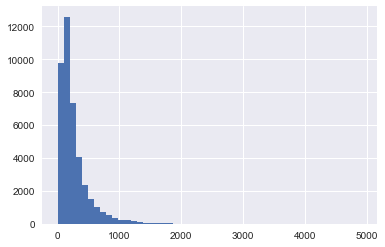

In [15]:
# duration 
#11 - duration: last contact duration, in seconds (numeric). 
#Important note: this attribute highly affects the output target 
#(e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. 

data.duration.hist(bins = 50)
print("NAs for duration : " + str(data.duration.isnull().values.sum()))
data.duration.value_counts()
#**Need to review duration feature, should stratify duration into groups (ie. no contact/less than 20 seconds..etc.)


1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64
NAs for campaign : 0


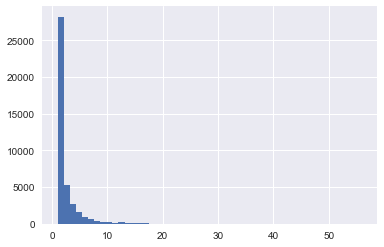

In [16]:
# campaign 
#- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
print(data.campaign.value_counts())
data.campaign.hist(bins = 50)
print("NAs for campaign : " + str(data.campaign.isnull().values.sum()))
#stratify/group campagin feature.

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64
NAs for pdays : 0
999 means client was not previously contacted


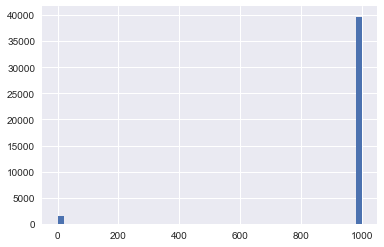

In [17]:
# pdays
#13 - pdays: number of days that passed by after the client was last contacted from 
#a previous campaign (numeric; 999 means client was not previously contacted)

data.pdays.hist(bins = 50)
print(data.pdays.value_counts())
print("NAs for pdays : " + str(data.pdays.isnull().values.sum()))
print("999 means client was not previously contacted")
# Obs are Very heavily skewed towards a 999 (no previous contact response)- should consider transforming for feature engineering 


0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64
NAs for previous : 0


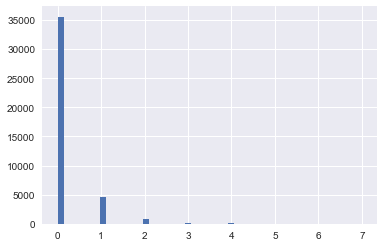

In [18]:
# previous
#14 - previous: number of contacts performed before this campaign and for this client (numeric)
data.previous.hist(bins = 50)
print(data.previous.value_counts())
print("NAs for previous : " + str(data.previous.isnull().values.sum()))
#stratify this into groups

In [19]:
# poutcome
#15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

print(data.poutcome.value_counts())
print("NAs for poutcome : " + str(data.poutcome.isnull().values.sum()))

#Again, very unveven distribution, should consider dropping or feature engineering

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64
NAs for poutcome : 0


## social and economic context attributes

In [ ]:
# Emp_var_rate
#16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)


data.emp_var_rate.hist(bins = 50)
print("NAs for emp_var_rate : " + str(data.emp_var_rate.isnull().values.sum()))


In [ ]:
# cons_price_idx
#17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
data.cons_price_idx.hist(bins = 50)
print("NAs for cons_price_idx : " + str(data.cons_price_idx.isnull().values.sum()))

In [ ]:
# cons_price_idx
#18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
data.cons_conf_idx.hist(bins = 50)
print("NAs for cons_conf_idx : " + str(data.cons_conf_idx.isnull().values.sum()))

In [ ]:
#19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
#Considering the product of interest here is term deposits, would expect libor to be a very significant attribute


data.euribor3m.hist(bins = 50)
print("NAs for euribor3m : " + str(data.euribor3m.isnull().values.sum()))

In [ ]:
#20 - nr.employed: number of employees - quarterly indicator (numeric)
data.nr_employed.hist(bins = 50)
print("NAs for nr_employed : " + str(data.nr_employed.isnull().values.sum()))

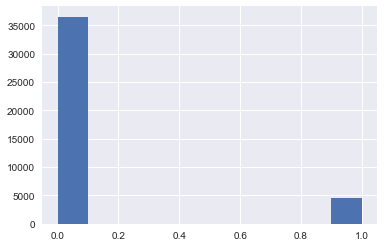

In [20]:
#21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

data.y.hist()

## Encoding:

In [ ]:
#Dont use, better way to encode all 
#Label encoding for categorical features:

#from sklearn.preprocessing import LabelEncoder

#label_encoder = dict()

#for feature in ['job','marital', 'education', 'default', 'housing', 'loan', 'contact',
#               'month', 'day_of_week', 'poutcome', 'y']:
#    print('encoding feature: {}'.format(feature))
#    label_encoder[feature] = LabelEncoder()
#    label_encoder[feature].fit(data[feature])
#    data.loc[:, feature + '_le'] = label_encoder[feature].transform(data[feature])

### Feature Engineering

In [21]:
#Stratify 'Campaign'
data["strat_Campaign"] = data.campaign.copy()
data.loc[data["campaign"] == 1, "strat_Campaign"] = 1
data.loc[data["campaign"] == 2, "strat_Campaign"] = 2
data.loc[(data["campaign"] >= 3) & (data["campaign"] <= 5), "strat_Campaign"] = 3
data.loc[data["campaign"] >= 6, "strat_Campaign"] = 4


In [22]:
#Now we can drop the original 'Campaign' category:
data = data.drop(["campaign"], axis = 1)

In [23]:
#Stratify 'Pdays' :
data["strat_Pdays"] = data.pdays.copy() 
data.loc[data["pdays"] == 999, "strat_Pdays"] = 1 # never contacted
data.loc[data["pdays"] < 7, "strat_Pdays"] = 2 # contacted less than a week ago (5 working days)
data.loc[(data["pdays"] >= 7) & (data["pdays"] < 14), "strat_Pdays"] = 3 # contacted less than 2 weeks ago
data.loc[data["pdays"] >= 14, "strat_Pdays"] = 4

In [24]:
#drop original Pdays:
data = data.drop(["pdays"], axis = 1)

In [25]:
#Stratify 'Previous contact'
data["strat_Previous"] = data.previous.copy()
data.loc[data["previous"] == 0, "strat_Previous"] = 1
data.loc[data["previous"] == 1, "strat_Previous"] = 2
data.loc[data["previous"] >= 2, "strat_Previous"] = 3

In [26]:
#drop original Previous:
data = data.drop(["previous"], axis = 1)

In [ ]:
#Stratify 'Duration': Replace Seconds with minutes, until every call after 5 mins
#data['Strat_duration'] = data.duration.copy()
#data.loc[data['duration'] <=60, 'strat_duration'] = 1
#data.loc[data['duration'] >=61 & (data['duration'] <=120), 'strat_duration'] = 2
#data.loc[data['duration'] >=121 & (data['duration'] <=180), 'strat_duration'] = 3
#data.loc[data['duration'] >=181 & (data['duration'] <=240), 'strat_duration'] = 4
#data.loc[data['duration'] >=241 & (data['duration'] <=240), 'strat_duration'] = 4

In [27]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#Stratify 'Duration': Replace Seconds with minutes, until every call after 5 mins
#data['Strat_duration'] = data.duration.copy()
#data.loc[data['duration'] / 60, 'strat_duration']
data['duration_mins'] = data['duration']/60


In [28]:
#Now we can drop the original duration column:
data = data.drop(["duration"], axis = 1)

In [ ]:

data.head()

In [ ]:
data.shape

In [ ]:
data.y.head()

In [29]:
# Separate out the numerical features (minus the target) and categorical features
y = data.y
categorical_features = data.select_dtypes(include = ["object"]).columns
numerical_features = data.select_dtypes(exclude = ["object"]).columns
numerical_features = numerical_features.drop("y")
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
data_num = data[numerical_features]
data_cat = data[categorical_features]


Numerical features : 10
Categorical features : 9


### Standardize Features:

In [30]:
# Standardize numerical features
scale = StandardScaler()
data_num = pd.DataFrame(scale.fit_transform(data_num), columns = data_num.columns)

In [31]:
#Create dummys for cat_features:
data_cat = pd.get_dummies(data_cat)

In [32]:
# Join categorical and numerical features
data = pd.concat([data_num, data_cat], axis = 1)
print("New number of features : " + str(data.shape[1]))

New number of features : 55


In [33]:
print (data.shape)
print (y.shape)


(41188, 55)
(41188,)


In [ ]:
#First Data clean:
# Write data in CSV files
#data.to_csv("pro_Data.csv", index = False)
#y.to_csv("pro_y.csv", index = False, header= False)

In [ ]:
#Second data clean:
# Write data in CSV files
data.to_csv("pro2_Data.csv", index = False)
y.to_csv("pro2_y.csv", index = False, header= False)

In [38]:
#Third data clean:
# Write data in CSV files
data.to_csv("pro3_Data.csv", index = False)
y.to_csv("pro3_y.csv", index = False, header= False)